## Models Including Expenses In Data

In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

data = pd.read_csv('Resources/P3_Data.csv')
data.head(312)

,Quarter,Year,Company_Name,Ticker,SharePrice_USD,Expenses_B_USD,Revenue_B_USD,CashFlow_B_USD,DividendYield_Percent,US_Unemployment_Percent,Brent_USD,LNG_USD,US_Interest_Percent
0,1,2005,Exxon,XOM,56,61.76,82.05,10.26,0.0027,0.053,48,9.89,0.0247
1,1,2005,BP,BP,62,47.08,55.51,6.52,0.0051,0.053,48,9.89,0.0247
2,1,2005,Equinor,EQNR,17,9.96,13.35,1.73,0.0000,0.053,48,9.89,0.0247
3,1,2005,Chevron,CVX,57,34.46,41.61,2.44,0.0040,0.053,48,9.89,0.0247
4,1,2005,Shell,RDS-A,63,62.36,72.16,5.16,0.0000,0.053,48,9.89,0.0247
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,4,2017,BP,BP,40,67.56,67.82,1.48,0.0060,0.042,61,3.84,0.0120
308,4,2017,Equinor,EQNR,20,11.93,17.11,1.71,0.0022,0.042,61,3.84,0.0120
309,4,2017,Chevron,CVX,118,35.96,36.38,2.59,0.0108,0.042,61,3.84,0.0120
310,4,2017,Shell,RDS-A,65,80.59,85.42,1.41,0.0094,0.042,61,3.84,0.0120


In [20]:
df = data.drop(data.columns[[0, 1, 2, 3, 5]], axis=1)
df

,SharePrice_USD,Revenue_B_USD,CashFlow_B_USD,DividendYield_Percent,US_Unemployment_Percent,Brent_USD,LNG_USD,US_Interest_Percent
0,56,82.05,10.26,0.0027,0.053,48,9.89,0.0247
1,62,55.51,6.52,0.0051,0.053,48,9.89,0.0247
2,17,13.35,1.73,0.0000,0.053,48,9.89,0.0247
3,57,41.61,2.44,0.0040,0.053,48,9.89,0.0247
4,63,72.16,5.16,0.0000,0.053,48,9.89,0.0247
...,...,...,...,...,...,...,...,...
307,40,67.82,1.48,0.0060,0.042,61,3.84,0.0120
308,20,17.11,1.71,0.0022,0.042,61,3.84,0.0120
309,118,36.38,2.59,0.0108,0.042,61,3.84,0.0120
310,65,85.42,1.41,0.0094,0.042,61,3.84,0.0120


In [21]:
import statsmodels.api as OLS

X = df[["Revenue_B_USD", "CashFlow_B_USD", "DividendYield_Percent", "US_Unemployment_Percent", "Brent_USD", "LNG_USD", "US_Interest_Percent"]]
y = df["SharePrice_USD"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (312, 7) (312, 1)


In [22]:
import statsmodels.api as sm
X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     24.70
Date:                Mon, 13 Jul 2020   Prob (F-statistic):           1.36e-26
Time:                        22:57:22   Log-Likelihood:                -1379.5
No. Observations:                 312   AIC:                             2775.
Df Residuals:                     304   BIC:                             2805.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      29.6457      6.574      4.510      0.000      16.710      42.582
Revenue_B_USD               0.2458      0.048      5.165      0.000       0.152       0.340
CashFlow_B_USD              0.8659      0.408      2.121      0.035       0.062       1.669
DividendYield_Percent    2795.6558    327.306      8.541      0.000    2151.584    3439.728
US_Unemployment_Percent  -138.4598     83.933     -1.650      0.100    -303.623      26.703
Brent_USD                   0.0854      0.057      1.501      0.134      -0.027       0.197
LNG_USD                    -0.2102      0.449     -0.468      0.640      -1.095       0.674
US_Interest_Percent        73.9367    100.513      0.736      0.463    -123.852     271.725
==============================================================================
Omnibus:                       20.630   Durbin-Watson:                   2.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.467
Skew:                           0.672   Prob(JB):                     8.02e-06
Kurtosis:                       2.969   Cond. No.                     2.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

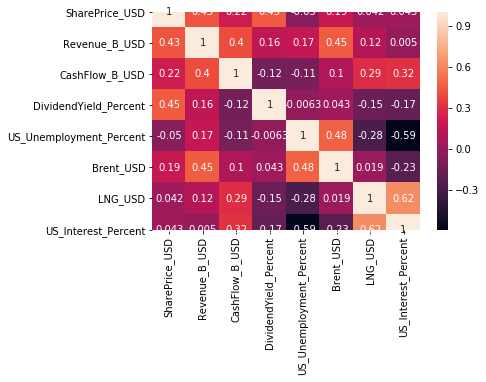

In [24]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df.corr()

sn.heatmap(corrMatrix, annot=True)
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.36254571740430813


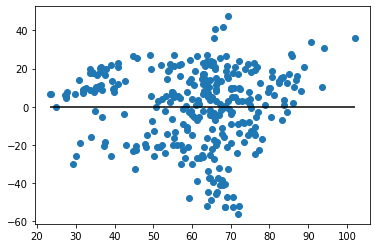

In [38]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [26]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [41]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

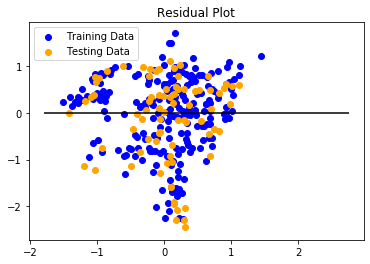

In [42]:
model.fit(X_train_scaled, y_train_scaled)

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [43]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8278855670826073, R2: 0.29443125574021634


In [44]:
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.829220704292338, R2: 0.2932933797801319


In [45]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8278845435114596, R2: 0.29443212808276964


In [46]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8282481239450271, R2: 0.29412226522230966


In [27]:
# test the decision tree model

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.05128205128205128

In [32]:
# test the decision random forest classifier model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.07692307692307693

In [34]:
# find the most important variables as found in the random forest

feature_names = df.columns

sorted(zip(rf.feature_importances_, feature_names), reverse=True) 

[(0.20828209640586454, 'Revenue_B_USD'),
 (0.18451220943302651, 'CashFlow_B_USD'),
 (0.16316144397065901, 'DividendYield_Percent'),
 (0.11685594112238903, 'LNG_USD'),
 (0.114354562785228, 'Brent_USD'),
 (0.10725200960943566, 'US_Unemployment_Percent'),
 (0.10558173667339721, 'US_Interest_Percent'),
 (0.0, 'SharePrice_USD')]

In [47]:
# Run auto ML - review Saturday class

In [ ]:
# Track results - take features, gather data on 2018 - graph model, predictions vs. actual

## Working with Categorical Data

What's wrong with the following code?

```
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
```

Machine Learning algorithms work with numerical data. We have to convert our strings into meaningful numbers. We often use Integer, One-hot, or Binary Encoding. Sklearn provides a preprocessing libarary for all of these standard preprocessing techniques. Pandas also provides a `get_dummies` method that is useful to generate binary encoded data from a Data Frame. 

## Dummy Encoding (Binary Encoded Data)

Dummy Encoding transforms each categorical feature into new columns with a 1 (True) or 0 (False) encoding to represent if that categorical label was present or not in the original row. 

Pandas provides a shortcut to create Binary Encoded data.

In [4]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["gender"])
data_binary_encoded.head()

,age,size,gender_Female,gender_Male
0,20-46,4512,0,1
1,20-46,3738,0,1
2,20-46,4261,0,1
3,20-46,3777,0,1
4,20-46,4177,0,1


We can encode multiple columns using `get_dummies`.

In [5]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
0,4512,0,1,1,0
1,3738,0,1,1,0
2,4261,0,1,1,0
3,3777,0,1,1,0
4,4177,0,1,1,0


## Scaling and Normalization

The final step that we need to perform is scaling and normalization. Many algorithms will perform better with a normalized or scaled dataset. You may not see a difference with the Sklearn LinearRegression model, but other models that use gradient descent need normalization to help the algorithms converge to a local optima.

Sklearn provides a variety of scaling and normalization options. The two most common are minmax and StandardScaler. Use StandardScaler when you don't know anything about your data.

The first step is to split your data into Training and Testing using `train_test_split`.

In [6]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
125,3782,0,1,0,1
119,3937,0,1,0,1
66,3415,0,1,0,1
216,3246,1,0,0,1
67,3372,0,1,0,1


### StandardScaler

Now, we fit our StandardScaler model to our training data. We can apply this StandardScaler model to any future data. Note that we use this fit/transform approach so that we isolate our testing data from the training data that we use to fit our model. Otherwise, we might bias our model to the testing data. 

In [7]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

StandardScaler applies a Gaussian distribution to our data where the mean is 0 and the standard deviation is 1. We can see the difference in the following plots.

In [9]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["size"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["size"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

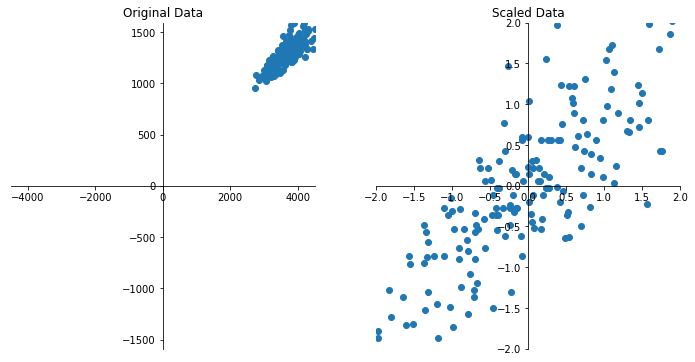

In [10]:
plt.show()

## Putting it all together

Step 1) Convert Categorical data to numbers using Integer or Binary Encoding

In [11]:
X = pd.get_dummies(brain[["size", "gender", "age"]])
y = brain["weight"].values.reshape(-1, 1)
X.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
0,4512,0,1,1,0
1,3738,0,1,1,0
2,4261,0,1,1,0
3,3777,0,1,1,0
4,4177,0,1,1,0


Step 2) Split data into training and testing data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Step 3) Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

In [13]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

Step 4) Fit the Model to the scaled training data and make predictions using the scaled test data

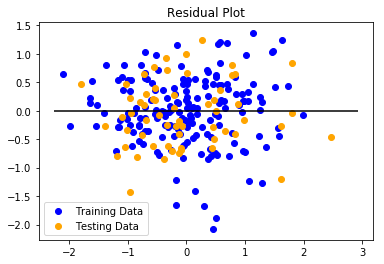

In [14]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

Step 5) Quantify your model using the scaled data

In [15]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3230551580991294, R2: 0.6804912531419804


Your Turn!